In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
movies = pd.read_csv('./data/data_for_eda.csv')
movies.drop(columns=['Unnamed: 0'], inplace = True)

In [7]:
movies.columns

Index(['tconst', 'primary_title', 'release_year', 'runtime', 'rating', 'votes',
       'tomato_score', 'metacritic_score', 'mpaa_rating', 'plot', 'genre_1',
       'genre_2', 'genre_3', 'director_1', 'director_2', 'director_3',
       'writer_1', 'writer_2', 'writer_3', 'cast_1', 'cast_2', 'cast_3',
       'cast_4', 'cast_5', 'cast_6', 'cast_7', 'cast_8', 'cast_9', 'cast_10',
       'plot_polarity'],
      dtype='object')

In [8]:
movies.head()

,tconst,primary_title,release_year,runtime,rating,votes,tomato_score,metacritic_score,mpaa_rating,plot,...,cast_2,cast_3,cast_4,cast_5,cast_6,cast_7,cast_8,cast_9,cast_10,plot_polarity
0,tt0111161,The Shawshank Redemption,1994,142,9.3,2540263,91%,80/100,R,"in 1947 portland, maine, banker andy dufresne ...",...,209.0,151.0,348409.0,6669.0,1104.0,175.0,555550.0,2353.0,5683.0,0.018280
1,tt0468569,The Dark Knight,2008,152,9.0,2490570,94%,84/100,PG-13,a gang of criminals rob a gotham city mob bank...,...,288.0,5132.0,1173.0,323.0,634240.0,634300.0,275286.0,4170.0,650038.0,0.042357
2,tt1375666,Inception,2010,148,8.8,2231336,87%,74/100,PG-13,"dominick ""dom"" cobb and arthur are ""extractors...",...,138.0,330687.0,680983.0,913822.0,634240.0,858799.0,1877.0,2892.0,809059.0,0.029848
3,tt0137523,Fight Club,1999,139,8.8,1999188,79%,66/100,R,"the narrator, an automobile recall specialist,...",...,93.0,1570.0,1533.0,340260.0,399.0,657333.0,880243.0,68501.0,149556.0,-0.008166
4,tt0109830,Forrest Gump,1994,142,8.8,1960064,70%,82/100,PG-13,"in 1981, at a bus stop in savannah, georgia, a...",...,158.0,705.0,641.0,398.0,709.0,343165.0,744839.0,277704.0,823330.0,0.079285


In [9]:
movies.columns

Index(['tconst', 'primary_title', 'release_year', 'runtime', 'rating', 'votes',
       'tomato_score', 'metacritic_score', 'mpaa_rating', 'plot', 'genre_1',
       'genre_2', 'genre_3', 'director_1', 'director_2', 'director_3',
       'writer_1', 'writer_2', 'writer_3', 'cast_1', 'cast_2', 'cast_3',
       'cast_4', 'cast_5', 'cast_6', 'cast_7', 'cast_8', 'cast_9', 'cast_10',
       'plot_polarity'],
      dtype='object')

In [10]:
movies.dtypes

tconst               object
primary_title        object
release_year          int64
runtime               int64
rating              float64
votes                 int64
tomato_score         object
metacritic_score     object
mpaa_rating          object
plot                 object
genre_1              object
genre_2              object
genre_3              object
director_1           object
director_2           object
director_3           object
writer_1             object
writer_2             object
writer_3             object
cast_1                int64
cast_2              float64
cast_3              float64
cast_4              float64
cast_5              float64
cast_6              float64
cast_7              float64
cast_8              float64
cast_9              float64
cast_10             float64
plot_polarity       float64
dtype: object

In [11]:
#the unique identifiers for cast are all reading in as ints, but should be strings

for i in range(1,11):
    movies['cast_'+str(i)] = movies['cast_'+str(i)].apply(lambda x: str(x))
    
#the review scores are reading as objects but should be floats

movies['tomato_score'] = movies['tomato_score'].apply(
    lambda x: str(x).replace('%','')).astype('float')

movies['metacritic_score'] = movies['metacritic_score']

In [12]:
movies.describe()

,release_year,runtime,rating,votes,tomato_score,plot_polarity
count,10000.000000,10000.000000,10000.000000,1.000000e+04,9129.000000,10000.000000
mean,2001.752100,109.671600,6.635040,8.338813e+04,61.821558,0.029124
std,16.558975,21.005134,1.021927,1.551992e+05,27.650014,0.087941
min,1941.000000,62.000000,1.000000,8.749000e+03,0.000000,-0.900000
25%,1994.000000,95.000000,6.100000,1.509175e+04,40.000000,-0.022116
50%,2006.000000,106.000000,6.700000,3.056650e+04,68.000000,0.025318
75%,2014.000000,119.000000,7.400000,8.122450e+04,86.000000,0.076692
max,2022.000000,237.000000,9.300000,2.540263e+06,100.000000,0.950000


before jumping into the EDA portion of my project, I should note that I selected my data set of 10,000 films based on which films had the most reviews, because I wanted to limit my dataset to primarily well known films, which I believed would simplify the recommendation process, and also would make it easier to collect further information on the films. 

In [13]:
#creating a decade column to look at how films have changed over the decades
movies['decade'] = movies['release_year'].apply(lambda x: round((x-4), -1))

In [14]:
movies.groupby('genre_1')['plot_polarity'].mean()

genre_1
Action         0.008188
Adventure      0.037044
Animation      0.044545
Biography      0.056394
Comedy         0.058623
Crime          0.001333
Documentary    0.078461
Drama          0.028776
Family         0.075744
Fantasy       -0.005702
Film-Noir      0.048597
Game-Show      0.122222
History        0.087010
Horror        -0.019372
Music         -0.096481
Musical        0.170121
Mystery        0.006349
Romance        0.001502
Sci-Fi         0.024523
Thriller       0.039066
War            0.015009
Western       -0.001375
Name: plot_polarity, dtype: float64

I was hoping to see more disparity between the plot polarity scores for various genres, but even the difference between horror and family films is quite small. I think I will still be including plot polarity in my recommendation algorithm because I do think it provides a small amount of measurable difference between films. 

Text(0.5, 1.0, 'Distribution of Release Year')

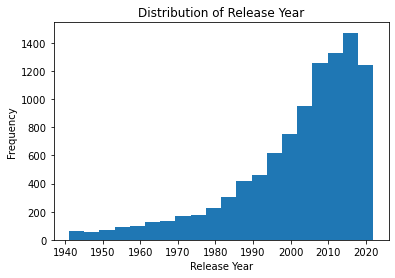

In [15]:
plt.hist(movies['release_year'], bins = 20)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Year')

Not surprisingly, the bulk of the "well known" films in our dataset are from 1980 or later, and an even larger majority with a release date of 2000 or later. As films get older they become less relevant/remembered.

Text(0.5, 1.0, 'Distribution of IMDB ratings')

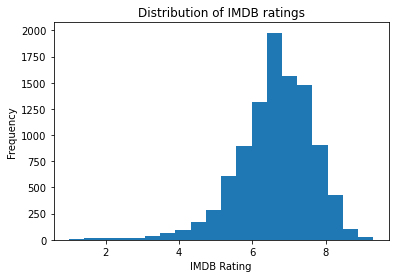

In [16]:
plt.hist(movies['rating'], bins = 20)
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDB ratings')

Looking at the distribution of IMDB score ratings in our dataset, it is interesting to note that the mean score is 6.6, with a median score of 6.7. normally I would expect the average score to be lower, but I believe this can be explained by the fact that I have limited my dataset to the 10,000 films with the most reviews. It is also possible that people dont think of 5/10 as being a score of a decent/average movie, and are inclined to rate higher overall.

Text(0.5, 1.0, 'Average IMDB Rating by Decade')

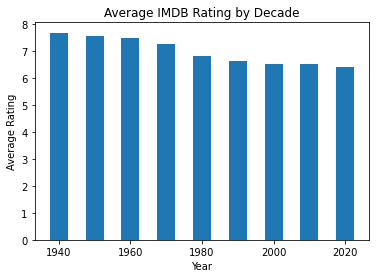

In [17]:
temp = pd.DataFrame(movies.groupby('decade')['rating'].mean()).reset_index()
plt.bar(temp['decade'], temp['rating'], width=5)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average IMDB Rating by Decade')

Above, we examine the relationship between average rating and the decade that the filmwas released in. This bar chart tells us that the select few movies from 60-80 years ago that are still being watched today are very highly praised.

Text(0.5, 1.0, 'Distribution of Movie Runtimes')

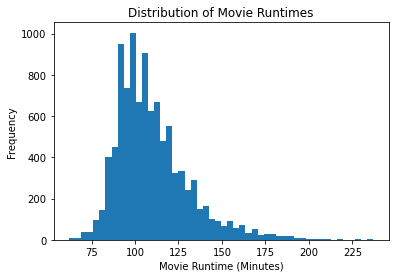

In [18]:
plt.hist(movies['runtime'], bins = 50)
plt.xlabel('Movie Runtime (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')

The vast majority of our films run for between 1.5 and two hours, which was expected.

Text(0.5, 1.0, 'Average Run Time by Decade')

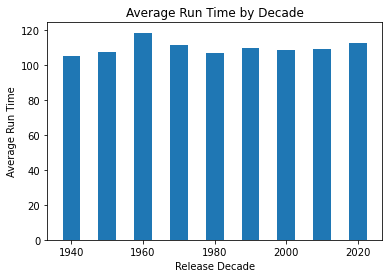

In [19]:
#examining the mean runtimes for movies by decade
temp = pd.DataFrame(movies.groupby('decade')['runtime'].mean()).reset_index()

plt.bar(temp['decade'], temp['runtime'], width=5)

plt.xlabel('Release Decade')
plt.ylabel('Average Run Time')
plt.title('Average Run Time by Decade')

Despite my perception that movies are rapidly becoming longer and more self indulgent, the dataset indicates that the mean runtime of films has only increased slightly over the last 80 years, with the 60's actually having the longest average run time. When we examine the median run time below, we see a similar trend.

Text(0.5, 1.0, 'Median Run Time by Decade')

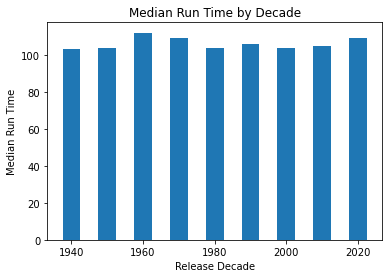

In [20]:
#examining the median runtimes for movies by decade
temp = pd.DataFrame(movies.groupby('decade')['runtime'].median()).reset_index()

plt.bar(temp['decade'], temp['runtime'], width=5)
plt.xlabel('Release Decade')
plt.ylabel('Median Run Time')
plt.title('Median Run Time by Decade')

Text(0.5, 1.0, 'Runtime vs IMDB Score')

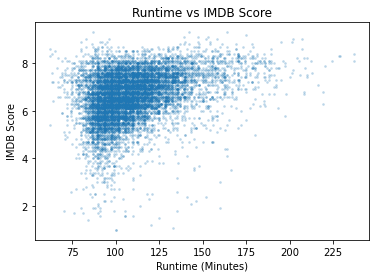

In [21]:
#examining the relationship between runtime and rating
plt.scatter(movies['runtime'], movies['rating'], s=3, alpha = 0.2)
plt.xlabel('Runtime (Minutes)')
plt.ylabel('IMDB Score')
plt.title('Runtime vs IMDB Score')

There is no obvious relationship here, seems to just be a mostly random scattering of points. People may tend of offer longer movies higher ratings, but this could also be because longer movies tend to have higher budgets/production value.

In [22]:
movies.groupby('decade')['plot_polarity'].mean()

decade
1940    0.038798
1950    0.026675
1960    0.025925
1970    0.024291
1980    0.026344
1990    0.028981
2000    0.033969
2010    0.027458
2020    0.025360
Name: plot_polarity, dtype: float64

The plot polarity score seems to remain very consistent accross the decades, with 1940 and 2000 displaying slightly higher scores

Text(0.5, 1.0, 'Distribution of Plot Polarity Scores')

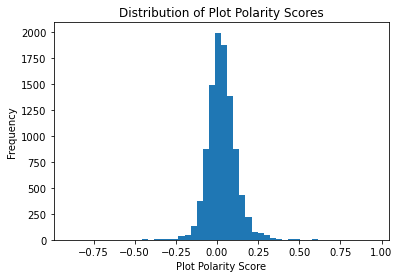

In [23]:
plt.hist(movies['plot_polarity'], bins = 50)
plt.xlabel('Plot Polarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Plot Polarity Scores')

the majority of films in our dataset have plot polarity scores that are within +/- 0.1 of 0, with the median score slightly above zero.

Text(0.5, 1.0, 'Runtime vs Plot Polarity')

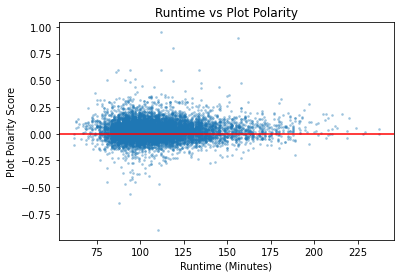

In [24]:
plt.scatter(movies['runtime'], movies['plot_polarity'], s = 3, alpha = 0.3)
plt.axhline(0, c = 'red')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Plot Polarity Score')
plt.title('Runtime vs Plot Polarity')

Here we examine the relationship between plot polarity and run time. Plot polarity is a score assigned to the complete synopsis of a film which factors in all of the words, and return a score that indicates how positive or negative the language used in the synopsis is. There does not seem to be a noticeable relationship between the two, with a similar distribution of plot polarity above and below 0 at all run times. in the cell below, we see a similar relationship between plot polarity and the run time of the film. 

Text(0.5, 1.0, 'Plot Polarity vs Release Decade')

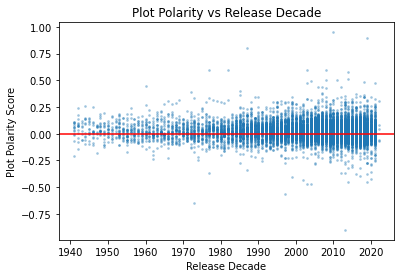

In [25]:
plt.scatter(movies['release_year'], movies['plot_polarity'], s = 3, alpha = 0.3)
plt.axhline(0, c = 'red')
plt.xlabel('Release Decade')
plt.ylabel('Plot Polarity Score')
plt.title('Plot Polarity vs Release Decade')

In the cells below, I examine the distribution and outliers for several of the numeric variables. I do not have any intention of dropping outliers, because even if these films will ultimately be recommended less frequently than other films, I would still like to have them in my database so that they may be recommended to users whose interests fit appropriately. 

Text(0.5, 1.0, 'Spread of the Runtime Variable')

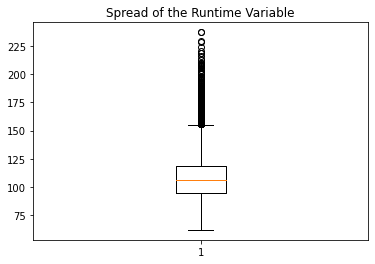

In [26]:
#outliers

plt.boxplot(movies['runtime'])
plt.title('Spread of the Runtime Variable')

Text(0.5, 1.0, 'Spread of the IMDB Rating Variable')

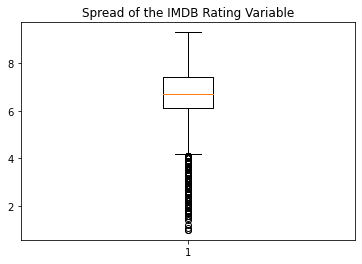

In [27]:
plt.boxplot(movies['rating'])
plt.title('Spread of the IMDB Rating Variable')

Text(0.5, 1.0, 'Spread of the Number of Reviews for a Film')

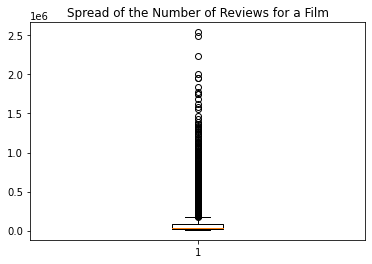

In [28]:
plt.boxplot(movies['votes'])
plt.title('Spread of the Number of Reviews for a Film')

Text(0.5, 1.0, 'Spread of the Plot Polarity Variable')

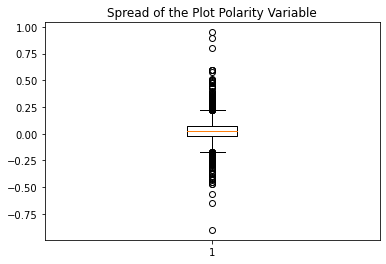

In [29]:
plt.boxplot(movies['plot_polarity'])
plt.title('Spread of the Plot Polarity Variable')

In [30]:
movies.describe()

,release_year,runtime,rating,votes,tomato_score,plot_polarity,decade
count,10000.000000,10000.000000,10000.000000,1.000000e+04,9129.000000,10000.000000,10000.00000
mean,2001.752100,109.671600,6.635040,8.338813e+04,61.821558,0.029124,1997.72500
std,16.558975,21.005134,1.021927,1.551992e+05,27.650014,0.087941,16.90275
min,1941.000000,62.000000,1.000000,8.749000e+03,0.000000,-0.900000,1940.00000
25%,1994.000000,95.000000,6.100000,1.509175e+04,40.000000,-0.022116,1990.00000
50%,2006.000000,106.000000,6.700000,3.056650e+04,68.000000,0.025318,2000.00000
75%,2014.000000,119.000000,7.400000,8.122450e+04,86.000000,0.076692,2010.00000
max,2022.000000,237.000000,9.300000,2.540263e+06,100.000000,0.950000,2020.00000


When looking at the summary table for my numeric variables, a few things stand out to me. 

The oldest movie on my list of popular movies was released in 1940. For reference, the first movie theater opened in 1905. More than half of the movies on my list of 10,000 most well known movies were released after 2006, so this dataset favors more recent movies. 

Run times are on average 109 minutes long, and have remained pretty consistent over the years. 

The ratings received by the most well known movies have a mean of 6.6 and a median of 6.7 out of 10. Since my dataset is limited to the most well known movies, it is not surprising that the average score is nearly 7/10, but I would be curious to look more into how people review movies, and how these scores become inflated. 

Plot polarity was a metric that I had higher hopes for, but the distribution of scores is pretty tightly grouped and there isn't a clear trend/disparity between genres. 
